# **Simple Linear Regression**

---



---




In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

# Author: **Tanmay Gharat**

In [ ]:
# Importing all libraries required in this task
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  

In [ ]:
# Importing dataset
url = "https://bit.ly/w-data"
data = pd.read_csv(url)

data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
data.shape

(25, 2)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


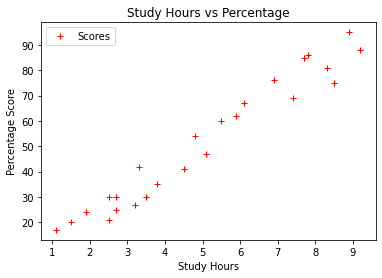

In [ ]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='r+')  
plt.title('Study Hours vs Percentage')  
plt.xlabel('Study Hours')  
plt.ylabel('Percentage Score')  
plt.show()

#####**It is clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

# Preparing and Splitting of data

In [ ]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values 

In [ ]:
from sklearn.model_selection import train_test_split
  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

We have split our data into training and testing sets, now its time to train our algorithm.

In [ ]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression()

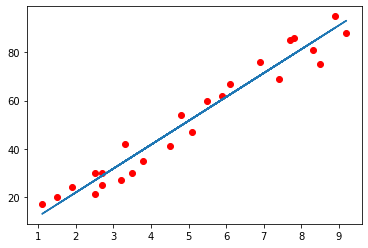

In [ ]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X,y,c="r")
plt.plot(X, line);
plt.show()

# **Predictions**

Now that we have trained our model its time to make some predictions

In [ ]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [ ]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [ ]:
# We can also test with your own data
hours = 9.25
we_pred = regressor.predict([[hours]])
print(f"No of Hours = {hours}")
print(f"Predicted Score = {we_pred[0]}")

No of Hours = 9.25
Predicted Score = 93.69173248737539


# Model Evaluation

In [ ]:
from sklearn import metrics
from sklearn.metrics import r2_score
print("Mean Absolute Error: ",metrics.mean_absolute_error(y_test,y_pred))
print("R2_score: ",r2_score(y_test,y_pred))

Mean Absolute Error:  4.183859899002982
R2_score:  0.9454906892105354
